In [39]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import linear_model
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import re
from datetime import datetime
import matplotlib.dates as dates

Import Data into Dataframes

In [3]:
set_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/sets.csv")
card_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/cards.csv")

C:\Users\thoma\AppData\Local\Temp\ipykernel_3412\2323603810.py:2: DtypeWarning: Columns (12,16,19,40,51) have mixed types. Specify dtype option on import or set low_memory=False.
  card_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/cards.csv")


In [4]:
set_info.columns

Index(['index', 'id', 'baseSetSize', 'block', 'booster', 'code', 'isFoilOnly',
       'isForeignOnly', 'isNonFoilOnly', 'isOnlineOnly', 'isPartialPreview',
       'keyruneCode', 'mcmId', 'mcmIdExtras', 'mcmName', 'mtgoCode', 'name',
       'parentCode', 'releaseDate', 'tcgplayerGroupId', 'totalSetSize',
       'type'],
      dtype='object')

In [5]:
card_info.columns

Index(['index', 'id', 'artist', 'asciiName', 'availability', 'borderColor',
       'cardKingdomFoilId', 'cardKingdomId', 'colorIdentity', 'colorIndicator',
       'colors', 'convertedManaCost', 'duelDeck', 'edhrecRank',
       'faceConvertedManaCost', 'faceName', 'flavorName', 'flavorText',
       'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit',
       'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative',
       'isFullArt', 'isOnlineOnly', 'isOversized', 'isPromo', 'isReprint',
       'isReserved', 'isStarter', 'isStorySpotlight', 'isTextless',
       'isTimeshifted', 'keywords', 'layout', 'leadershipSkills', 'life',
       'loyalty', 'manaCost', 'mcmId', 'mcmMetaId', 'mtgArenaId',
       'mtgjsonV4Id', 'mtgoFoilId', 'mtgoId', 'multiverseId', 'name', 'number',
       'originalReleaseDate', 'originalText', 'originalType', 'otherFaceIds',
       'power', 'printings', 'promoTypes', 'purchaseUrls', 'rarity',
       'scryfallId', 'scryfallIllustrationId', 'scryfa

These two filters removed all reprints and online cards

In [6]:
not_reprint = card_info.loc[card_info['isReprint'] == 0]

In [9]:
paper_only = not_reprint.loc[not_reprint['isOnlineOnly'] == 0]

In [11]:
top_edh = paper_only[paper_only['edhrecRank'] < 2000].sort_values('edhrecRank')

In [12]:
colors = {"R":"red","B":"black","W":"yellow","U":"blue","G":"green"}

In [13]:
top_edh.groupby('colors').count().loc[['B','R','U','W','G']]

,index,id,artist,asciiName,availability,borderColor,cardKingdomFoilId,cardKingdomId,colorIdentity,colorIndicator,...,subtypes,supertypes,tcgplayerProductId,text,toughness,type,types,uuid,variations,watermark
colors,,,,,,,,,,,,,,,,,,,,,
B,232,232,232,0,232,232,197,228,232,2,...,124,45,232,232,108,232,232,232,22,24
R,171,171,171,0,171,171,139,171,171,1,...,86,31,171,171,77,171,171,171,14,10
U,287,287,287,0,287,287,245,285,287,2,...,121,55,287,287,89,287,287,287,48,25
W,188,188,188,0,188,188,170,188,188,0,...,95,35,188,188,85,188,188,188,18,16
G,317,317,317,0,317,317,265,313,317,2,...,196,47,317,317,166,317,317,317,43,27


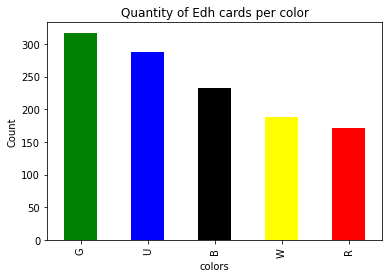

In [14]:
title_graph = 'Quantity of Edh cards per color'
top_edh.groupby('colors').count().loc[['B','R','U','W','G']].sort_values('index',ascending = False).plot.bar( y = 'index', ylabel = 'Count',title = title_graph, legend = False , color = ['green','blue','black','yellow','red']);

As we can see here green and blue dominate the top 2000 cards in edh according to Edhrec. (Keeping in mind that this data is about a year old). I think its a bit suprising how white pulls ahead of red but given that red is all about burn and aggression it makes sense that a format that values politics and playing along wouldnt have a ton of red cards being run in everyones decks.

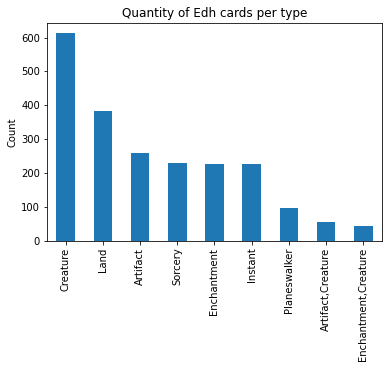

In [15]:
title_graph = 'Quantity of Edh cards per type'
top_edh.groupby('types').count().sort_values('index',ascending = False).loc[lambda x: x['index'] > 10].plot.bar(legend = False,ylabel = 'Count',title = title_graph,y='index',xlabel='');

The way these types order themselves is suprising close to my own personal experience. Commander unsuprisingly is dominated by creatures. Lands arent all that suprising though as every deck needs lands.

In [16]:
set_counts = top_edh.groupby('setCode').count().sort_values('index',ascending = False)

In [17]:
sets_sorted_date = pd.merge(set_counts,set_info,left_index = True, right_on = 'code').sort_values('releaseDate')

In [18]:
sets_sorted_date

,index_x,id_x,artist,asciiName,availability,borderColor,cardKingdomFoilId,cardKingdomId,colorIdentity,colorIndicator,...,mcmId_y,mcmIdExtras,mcmName,mtgoCode,name_y,parentCode,releaseDate,tcgplayerGroupId,totalSetSize,type_y
197,38,38,38,0,38,38,0,38,30,0,...,NaN,NaN,NaN,NaN,Limited Edition Alpha,NaN,1993-08-05,7.0,295,core
198,1,1,1,0,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,Limited Edition Beta,NaN,1993-10-04,17.0,302,core
25,1,1,1,0,1,1,0,1,0,0,...,4.0,NaN,Arabian Nights,NaN,Arabian Nights,NaN,1993-12-17,11.0,92,expansion
27,19,19,19,0,19,19,0,19,0,0,...,5.0,NaN,Antiquities,NaN,Antiquities,NaN,1994-03-04,8.0,101,expansion
199,7,7,7,0,7,7,0,7,7,0,...,7.0,NaN,Legends,NaN,Legends,NaN,1994-06-01,65.0,310,expansion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,4,4,4,0,4,4,0,4,4,0,...,NaN,NaN,NaN,C20,Commander 2020,NaN,2020-04-17,2634.0,322,commander
166,31,31,31,0,31,31,31,31,27,0,...,2819.0,3113.0,Ikoria: Lair of Behemoths,IKO,Ikoria: Lair of Behemoths,NaN,2020-04-24,2603.0,388,expansion
210,28,28,28,0,28,28,28,28,26,0,...,3048.0,NaN,Core 2021,M21,Core Set 2021,NaN,2020-07-03,2653.0,397,core
552,27,27,27,0,27,27,19,19,25,0,...,3404.0,3474.0,Zendikar Rising,ZNR,Zendikar Rising,NaN,2020-09-25,2648.0,392,expansion


In [20]:
sets_sorted_date.code

197    LEA
198    LEB
25     ARN
27     ATQ
199    LEG
      ... 
43     C20
166    IKO
210    M21
552    ZNR
54     CMR
Name: code, Length: 118, dtype: object

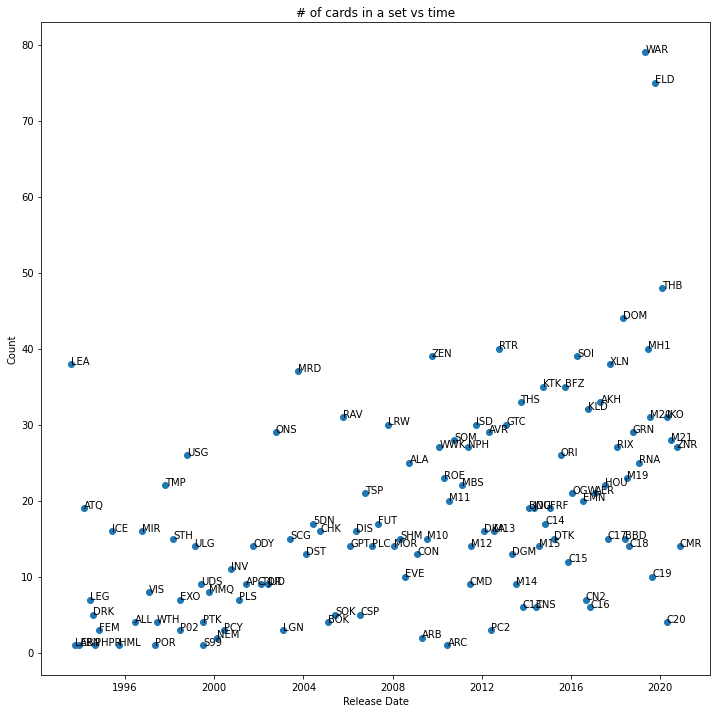

In [44]:
fig, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(pd.to_datetime(sets_sorted_date['releaseDate']),sets_sorted_date['index_x']);
ax1.set(xlabel = 'Release Date', ylabel = 'Count', title = 'Time vs # of cards in a set');
for i, txt in enumerate(sets_sorted_date['code']):
    ax1.annotate(txt, (pd.to_datetime(sets_sorted_date.releaseDate.iat[i]),sets_sorted_date.index_x.iat[i]))


The following plot was pretty suprising. First of all the overall trend is that the newer a card is the more likely its going to end up in a deck this trend is likley fit well by a linear function. Secondly I would assume that most people would be suprised to find all the commander specific products to be found at the bottom of this graph. This can be accounted for in the next analysis.

In [22]:
top_cards_per_set = pd.Series(dtype = 'float64',name = 'code')
for g in top_edh.groupby('setCode').groups:
    top_cards_per_set[g] = top_edh.groupby('setCode').get_group(g)['edhrecRank'].min()

Added the set info to the cards

In [23]:
top_cards_per_set_expanded = pd.merge(top_cards_per_set, set_info, left_index = True, right_on = 'code')

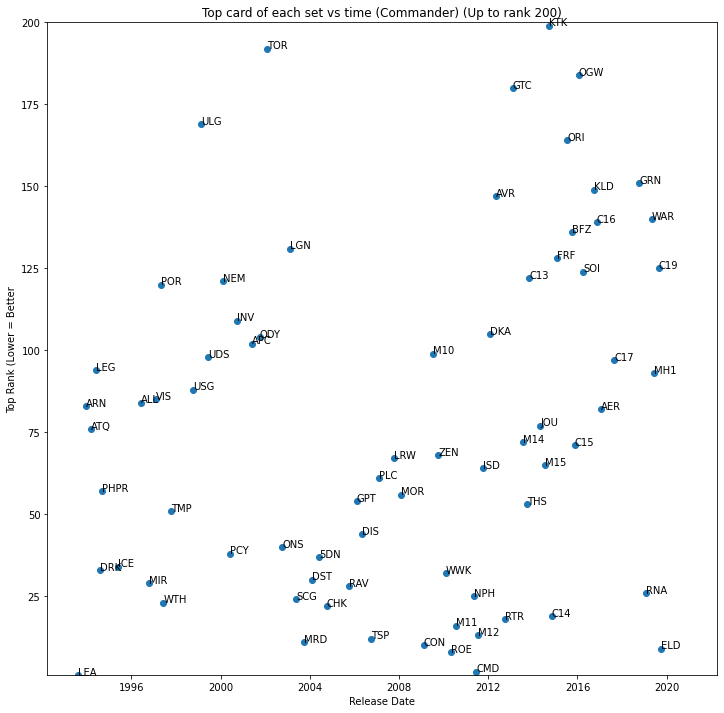

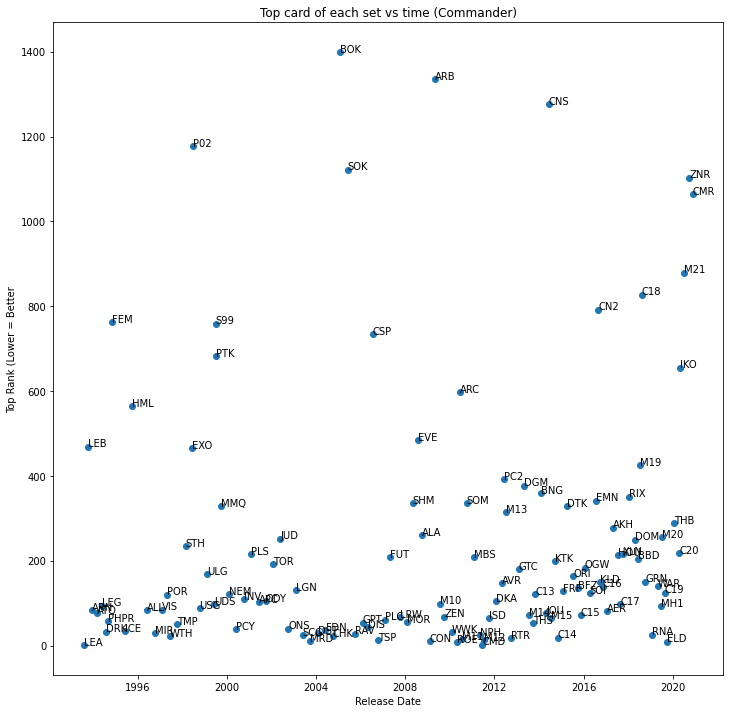

In [46]:
fig, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(pd.to_datetime(top_cards_per_set_expanded['releaseDate']), top_cards_per_set);
ax1.set(xlabel = 'Release Date', ylabel = 'Top Rank (Lower = Better', title = 'Time vs Top card of each set (Commander) (Up to rank 200)',ylim = (1,200));
for i, txt in enumerate(top_cards_per_set):
    ax1.annotate(top_cards_per_set.index[i], (pd.to_datetime(top_cards_per_set_expanded.releaseDate.iat[i]),top_cards_per_set[i]))
    
fig, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(pd.to_datetime(top_cards_per_set_expanded['releaseDate']), top_cards_per_set);
ax1.set(xlabel = 'Release Date', ylabel = 'Top Rank (Lower = Better', title = 'Time vs Top card of each set (Commander)');
for i, txt in enumerate(top_cards_per_set):
    ax1.annotate(top_cards_per_set.index[i], (pd.to_datetime(top_cards_per_set_expanded.releaseDate.iat[i]),top_cards_per_set[i]))

These two graphs show where each set falls when it comes to the most played cards in each of these sets. its no suprise to find that Alpha edition is #1 becasue of how heavily sol ring is played in commander.

In [56]:
mean_of_sets =pd.merge(top_edh.groupby('setCode').mean(), set_info, left_index = True, right_on = 'code') 

In [57]:
mean_of_sets

,index_x,id_x,cardKingdomFoilId,cardKingdomId,convertedManaCost,edhrecRank,faceConvertedManaCost,hand,hasAlternativeDeckLimit,hasContentWarning,...,mcmId_y,mcmIdExtras,mcmName,mtgoCode,name,parentCode,releaseDate,tcgplayerGroupId,totalSetSize,type
6,2356.058824,2357.058824,111681.529412,111510.529412,3.000000,933.823529,NaN,NaN,0.0,0.0,...,47.0,NaN,Fifth Dawn,5DN,Fifth Dawn,NaN,2004-06-04,43.0,165,expansion
13,4662.190476,4663.190476,210669.380952,210478.666667,2.809524,862.619048,NaN,NaN,0.0,0.0,...,1718.0,NaN,Aether Revolt,AER,Aether Revolt,NaN,2017-01-20,1857.0,197,expansion
15,4930.666667,4931.666667,212048.151515,211773.303030,2.787879,1107.969697,NaN,NaN,0.0,0.0,...,1729.0,NaN,Amonkhet,AKH,Amonkhet,NaN,2017-04-28,1882.0,287,expansion
17,5575.120000,5576.120000,125994.720000,125752.440000,2.080000,940.640000,NaN,NaN,0.0,0.0,...,102.0,NaN,Shards of Alara,ALA,Shards of Alara,NaN,2008-10-03,103.0,249,expansion
18,5759.250000,5760.250000,NaN,116005.500000,2.750000,204.000000,NaN,NaN,0.0,0.0,...,15.0,NaN,Alliances,NaN,Alliances,NaN,1996-06-10,6.0,199,expansion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,55331.500000,55332.500000,NaN,33051.250000,2.750000,513.000000,NaN,NaN,0.0,0.0,...,18.0,NaN,Weatherlight,WL,Weatherlight,NaN,1997-06-09,121.0,167,expansion
546,55517.740741,55518.740741,130255.074074,130089.259259,2.259259,920.185185,NaN,NaN,0.0,0.0,...,118.0,NaN,Worldwake,WWK,Worldwake,NaN,2010-02-05,122.0,145,expansion
548,55746.657895,55747.657895,214297.600000,213994.366667,3.157895,1124.842105,1.125,NaN,0.0,0.0,...,1812.0,NaN,Ixalan,XLN,Ixalan,NaN,2017-09-29,2043.0,289,expansion
549,56044.717949,56045.717949,128121.256410,127868.051282,2.128205,863.641026,NaN,NaN,0.0,0.0,...,114.0,NaN,Zendikar,ZEN,Zendikar,NaN,2009-10-02,124.0,269,expansion


In [51]:
mean_of_sets.edhrecRank

setCode
5DN     933.823529
AER     862.619048
AKH    1107.969697
ALA     940.640000
ALL     204.000000
          ...     
WTH     513.000000
WWK     920.185185
XLN    1124.842105
ZEN     863.641026
ZNR    1676.777778
Name: edhrecRank, Length: 118, dtype: float64

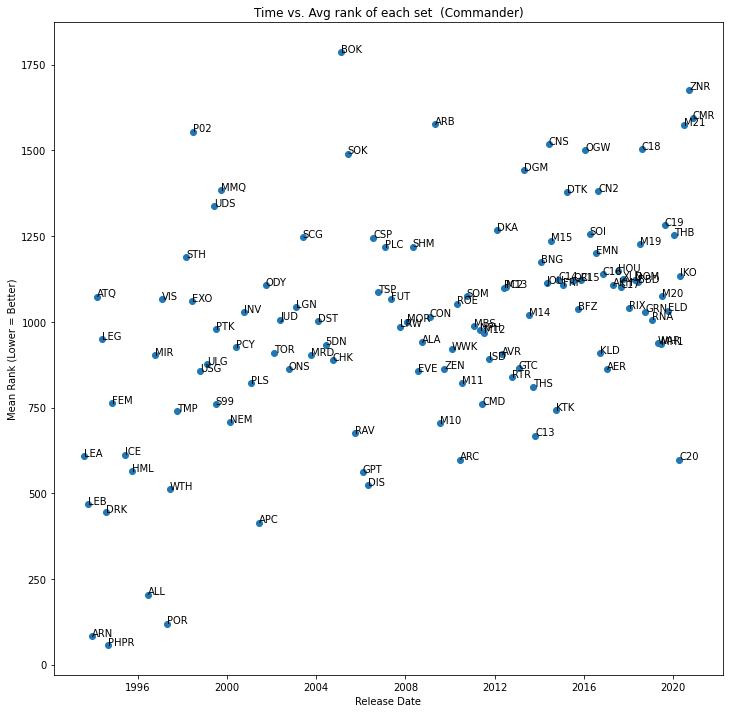

In [69]:
fig, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(pd.to_datetime(mean_of_sets['releaseDate']), mean_of_sets['edhrecRank']);
ax1.set(xlabel = 'Release Date', ylabel = 'Mean Rank (Lower = Better)', title = 'Time vs. Avg rank of each set  (Commander)');
for i, txt in enumerate(mean_of_sets['code']):
    ax1.annotate(txt, (pd.to_datetime(mean_of_sets.releaseDate.iat[i]),mean_of_sets.edhrecRank.iat[i]))

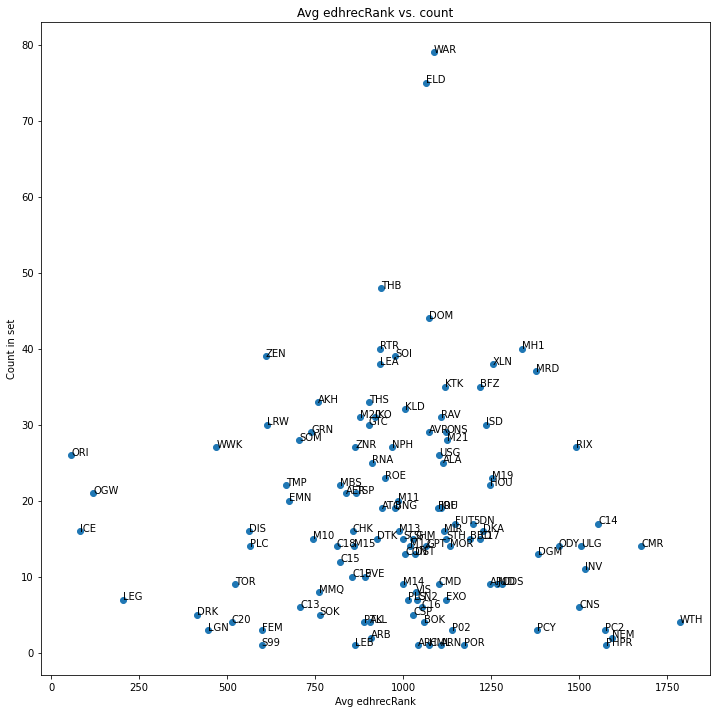

In [94]:
fig, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(mean_of_sets.reset_index()['edhrecRank'],sets_sorted_date.reset_index()['index_x'])
ax1.set(xlabel = 'Avg edhrecRank', ylabel = 'Count in set', title = 'Avg edhrecRank vs. count');
for i, txt in enumerate(sets_sorted_date.reset_index()['code']):
    ax1.annotate(txt,(mean_of_sets.reset_index()['edhrecRank'].iat[i],sets_sorted_date.reset_index()['index_x'].iat[i]))

In [87]:
 mean_of_sets.reset_index()['edhrecRank'].corr(sets_sorted_date.reset_index()['index_x'], method ='spearman')

-0.04663964670904173

In [98]:
top_cards_per_set

5DN      37.0
AER      82.0
AKH     278.0
ALA     260.0
ALL      84.0
        ...  
WTH      23.0
WWK      32.0
XLN     215.0
ZEN      68.0
ZNR    1103.0
Name: code, Length: 118, dtype: float64

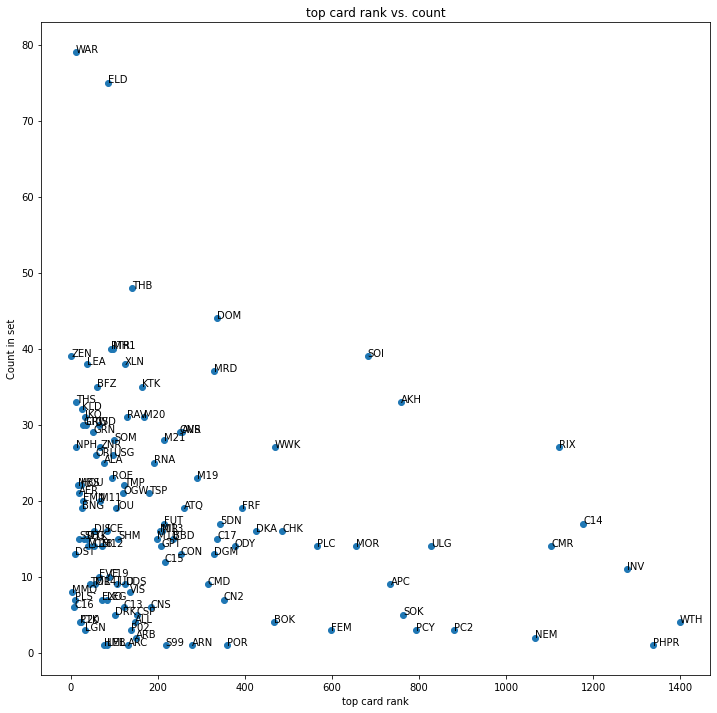

In [102]:
fig, ax1 = plt.subplots(figsize = (12,12))
ax1.scatter(top_cards_per_set,sets_sorted_date.reset_index()['index_x'])
ax1.set(xlabel = 'top card rank', ylabel = 'Count in set', title = 'top card rank vs. count');
for i, txt in enumerate(sets_sorted_date.reset_index()['code']):
    ax1.annotate(txt,(top_cards_per_set[i],sets_sorted_date.reset_index()['index_x'].iat[i]))